In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('Transformed_Housing_Data2.csv')

In [4]:
data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
data['mean_sales']=data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

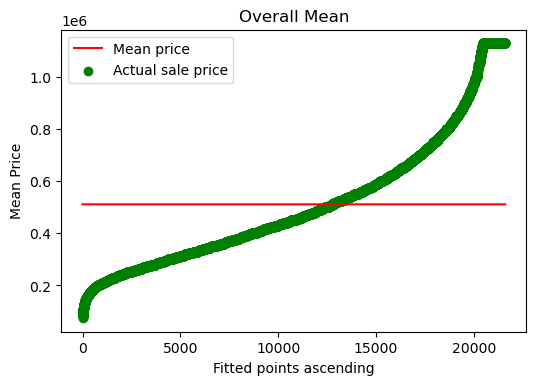

In [6]:
plt.figure(dpi=100)
k= range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color='Green',label='Actual sale price')
plt.plot(k,data['mean_sales'].sort_values(),color='red',label='Mean price')
plt.xlabel('Fitted points ascending')
plt.ylabel('Mean Price')
plt.title('Overall Mean')
plt.legend()

In [7]:
#mean wrt to grade of the house
grades_mean=data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [8]:
data['grade_mean']=0

#for every grade fill its mean price in grade_mean column
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]
    
data['grade_mean'].head(10)

<ipython-input-8-350345c7410d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]
<ipython-input-8-350345c7410d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i]=grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
5    960408.078866
6    402239.619779
7    402239.619779
8    402239.619779
9    402239.619779
Name: grade_mean, dtype: float64

Visualizing both the models together to see how they both compare to each other(mean and grade_mean)


In [9]:
gradewise_list =[]
for i in range(1,11):
    k= data['Sale_Price'][data['Overall Grade']==i]
    gradewise_list.append(k)
gradewise_list

[19450    142000.0
 Name: Sale_Price, dtype: float64,
 4409     1129575.0
 4809     1129575.0
 5449     1129575.0
 6039     1129575.0
 7033     1129575.0
 7250     1129575.0
 7905     1129575.0
 9252     1129575.0
 10371    1129575.0
 13409    1129575.0
 13698    1129575.0
 14554    1129575.0
 19015    1129575.0
 Name: Sale_Price, dtype: float64,
 1147     75000.0
 3221    262000.0
 5830    280000.0
 Name: Sale_Price, dtype: float64,
 348      299000.0
 463       80000.0
 1064     140000.0
 3580     355000.0
 3883     248000.0
 4866     228000.0
 5202     352000.0
 6478     217000.0
 7971     120000.0
 8595     205000.0
 8617     355000.0
 8621     325000.0
 9639     330000.0
 9792     435000.0
 11498    229050.0
 11586    188000.0
 12073    156000.0
 13999    130000.0
 14089    152000.0
 14579     95000.0
 15038    200000.0
 15710    150000.0
 16338    100000.0
 16528     90000.0
 17392    145000.0
 18050    247000.0
 18164    230000.0
 18377    265000.0
 19342    151000.0
 Name: Sale

In [10]:
classwise_list =[]
for i in range(1,11):
    k= data['Sale_Price'][data['Overall Grade']==i]
    classwise_list.append(k)
    
classwise_list

[19450    142000.0
 Name: Sale_Price, dtype: float64,
 4409     1129575.0
 4809     1129575.0
 5449     1129575.0
 6039     1129575.0
 7033     1129575.0
 7250     1129575.0
 7905     1129575.0
 9252     1129575.0
 10371    1129575.0
 13409    1129575.0
 13698    1129575.0
 14554    1129575.0
 19015    1129575.0
 Name: Sale_Price, dtype: float64,
 1147     75000.0
 3221    262000.0
 5830    280000.0
 Name: Sale_Price, dtype: float64,
 348      299000.0
 463       80000.0
 1064     140000.0
 3580     355000.0
 3883     248000.0
 4866     228000.0
 5202     352000.0
 6478     217000.0
 7971     120000.0
 8595     205000.0
 8617     355000.0
 8621     325000.0
 9639     330000.0
 9792     435000.0
 11498    229050.0
 11586    188000.0
 12073    156000.0
 13999    130000.0
 14089    152000.0
 14579     95000.0
 15038    200000.0
 15710    150000.0
 16338    100000.0
 16528     90000.0
 17392    145000.0
 18050    247000.0
 18164    230000.0
 18377    265000.0
 19342    151000.0
 Name: Sale

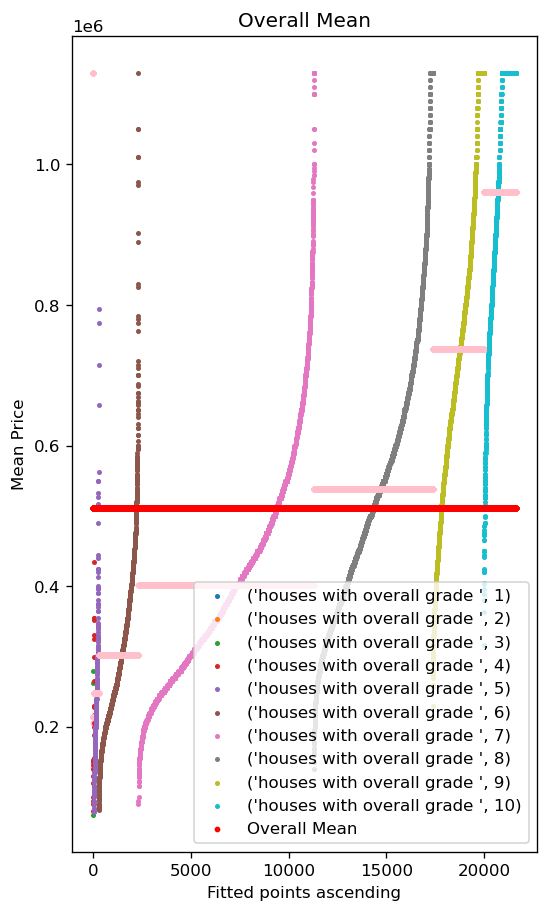

In [11]:
plt.figure(dpi=120,figsize=(5,9))

#plotting sale_price gradewise
#z variable is for x axis
z=0
for i in range(1,11):
    #defining x axis for using z
    points=[k for k in range(z,z+len(classwise_list[i-1]))]
    #plotting scatter plot for every grade from 1-10
    plt.scatter(points,classwise_list[i-1].sort_values(),label=('houses with overall grade ',i),s=4)
    #plotting gradewise_mean
    plt.scatter(points,[classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],s=6,color='pink')
    
    z=max(points)+1

#plotting overall mean
plt.scatter([q for q in range(0,z)],data['mean_sales'],color='red',label='Overall Mean',s=6)
plt.xlabel('Fitted points ascending')
plt.ylabel('Mean Price')
plt.title('Overall Mean')
#specifying the position to display the lables at the bottom right of the plot
plt.legend(loc=4)

#Alternative-Residual plot

In [12]:
#Residual plot
mean_difference= data['mean_sales']-data['Sale_Price']
grade_mean_difference= data['grade_mean']-data['Sale_Price']

Text(0.5, 1.0, 'Residuals wrt to gradewise mean')

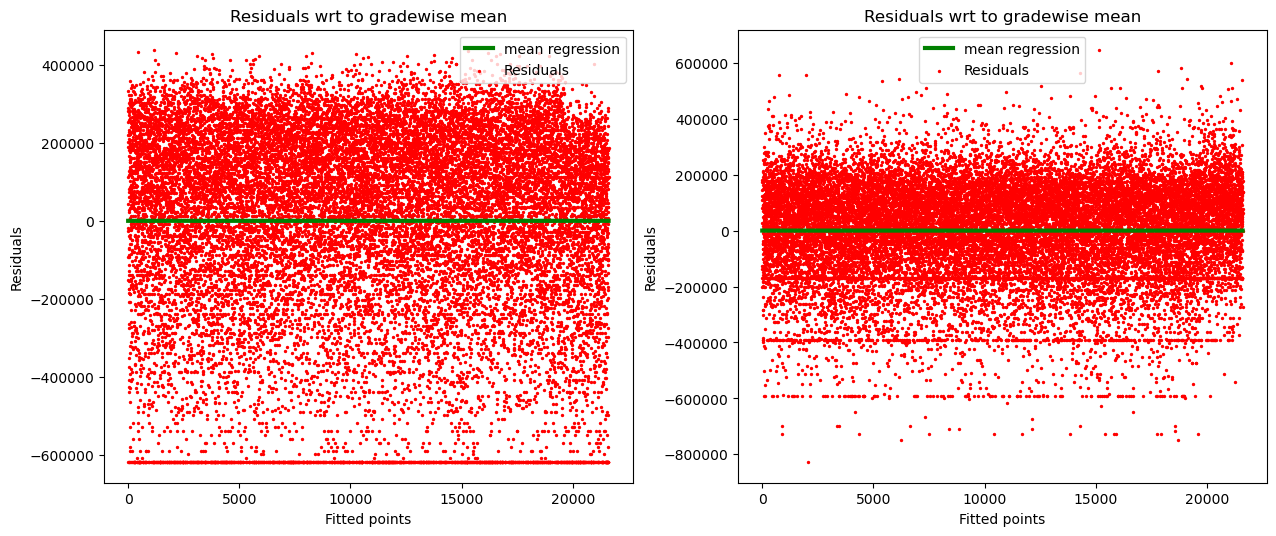

In [13]:
#k is used to create the list of indices of data points
k=range(0,len(data))
#A list of 0 which will represent the residuals of a perfect model
#where predictions are exactly as same as actuals and hence the residuals would be zero
l=[0 for i in range(len(data))]
plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)
#plotting residual plot for the overall mean of the saleprice
#y axis represent the residuals,k is the x axis
plt.scatter(k,mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean regression',linewidth='3')
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals wrt to gradewise mean')
#Mean regression models are quick and easy, they are used to have an estimate on the lower bound performance of thefuture models on the dataset.

plt.subplot(1,2,2)
#mean housing sale price wrt to overall sale price
plt.scatter(k,grade_mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean regression',linewidth='3')
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals wrt to gradewise mean')


we infer from the residual plot of simple mean regression:
 "Spread of data" of the target variable
 Possible "outliers" in target variable
This proves mean regression based on categorical feature will give better results

Mean Error

In [14]:
 cost=sum(mean_difference)/len(data)
print(round(cost,7))

0.0


MAE(Mean Absolute Error)-taking absolute of all the residuals then taking the mean


In [15]:
 cost=sum(abs(mean_difference))/len(data)
print(round(cost,7))

199168.7814684


In [16]:
Y=data['Sale_Price']
Y_hat1=data['mean_sales']
Y_hat2=data['grade_mean']
n=len(data)
len(Y),len(Y_hat1),len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [17]:
cost=sum(abs(Y_hat1-Y))/n
cost

199168.78146839526

In [18]:
cost=sum(abs(Y_hat2-Y))/n
cost

137081.70298203363

Mean Absolute Error using scikit-learn library

In [19]:
from sklearn.metrics import mean_absolute_error
cost=mean_absolute_error(Y_hat2,Y)
cost

137081.7029820291

In [20]:
#MAE tells how far the predicted value is expected to lie  from actual data point
#MSE-first square the errors and then sum up
#2 fold effect and is better than mean absolute error as- 1 ,it turns all differences into a positive quantityand also
#incurs extra penalty for larger difference bw the actual and predicted values,explores for the large difference
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)
cost_grade_mean=mean_squared_error(Y_hat2,Y)
cost_mean,cost_grade_mean



(62528116847.799576, 30804835720.342426)

In [21]:
#Root mean square error ,gives the expected average distance
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean=mean_squared_error(Y_hat2,Y)**0.5
cost_mean,cost_grade_mean
#RMSE>MAE but in same scale

(250056.2273725643, 175513.06424406826)

Model evaluation metrics 2-Evaluation using R square and adjusted r square-how good the model is in percent terms
R^2=relative error of regression model ,with respect to the simple mean regression model

Consider that:
Ỹ : is the mean of the "Sale Price"
Ý: is the predicted values from a regression model
Y: represents the actual “Sale_Price"

R² = 1- [Σ (Ý-Yi)² / Σ (Ỹ - Yi) ²]=1-MSE(model)/MSE(mean) {ratio of mean square model we want to evaluate to the rstion of mean square error of simple mean regression model,the lower the ration the better}

Generall the value of R square is said to be between 0 to 1 but it can take the value from negative infinity to 0 -ve value is only possible if the regression model we are trying to evaluate is even worse than the mean regression model 

Where Σ(Yi-Yi)² = n*MSE of simple mean model
And
Σ(Yi - Yi)² = n * MSE of regression model we want to evaluate

In [22]:
Y=data['Sale_Price']
Y_bar=data['mean_sales']
Y_hat=data['grade_mean']
n=len(data)
len(Y),len(Y_bar),len(Y_hat),n

(21609, 21609, 21609, 21609)

In [23]:
mse_mean=mean_squared_error(Y_bar,Y)
mse_model=mean_squared_error(Y_hat,Y)
mse_mean,mse_model

(62528116847.799576, 30804835720.342426)

In [24]:
#R2 is the degree to which  you input variable explain the variation of target or output variable,if r2 is 50% that means
#50 percent of variations are explained by the R2 variable,the higher the r2 ,the more is the variation explained by the models
#and hence better the model,R2 is a popular evaluation metric as it gives us a measure of model error in percent terms and easier
#to understand and compare,but the draw back is with the addition of more variables either they will remain same or increase
#even if they do not have any relationship with the output variable
R2= 1- mse_model/mse_mean
R2

0.5073442592981836

In [25]:
#Adjusted R2 penalizes the for adding variables which do not  improve existing model

LINEAR REGRESSION MODEL?

Previously we dealt with simple mean regression model(based on mean prediction and mean prediction based on some inpuut feature